In [16]:
import pandas as pd
import numpy as np
import igraph as ig
import os
import pickle
import pycountry
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs

In [17]:
with open("./data/graph.pickle", "rb") as f:
    g = pickle.load(f)
    
g.vcount(), g.ecount(), g.is_directed()

(508, 15333, True)

In [18]:
def is_eu(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        return country.alpha_2 in ('AD', 'AL', 'AM', 'AT', 'AZ', 'BA', 'BE', 'BG', 'BY', 'CH', 'CY', 'CZ', 
                                   'DE', 'DK', 'EE', 'ES', 'FI', 'FO', 'FR', 'GB', 'GE', 'GI', 'GR', 'HR', 
                                   'HU', 'IE', 'IS', 'IT', 'KZ', 'LI', 'LT', 'LU', 'LV', 'MC', 'MD', 'ME', 
                                   'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'RU', 'SE', 'SI', 'SK', 
                                   'SM', 'TR', 'UA', 'VA')
    except:
        return False

In [19]:
airports_df = pd.read_csv('./data/airports.csv', sep=',', engine='python')
airports_df = airports_df[[is_eu(r['Country']) for _, r in airports_df.iterrows()]]
airports_df = airports_df.reset_index(drop=True)
airports_df.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,11,Akureyri Airport,Akureyri,Iceland,AEY,BIAR,65.660004,-18.072701,6,0,N,Atlantic/Reykjavik,airport,OurAirports
1,12,Egilsstaðir Airport,Egilsstadir,Iceland,EGS,BIEG,65.283302,-14.401400,76,0,N,Atlantic/Reykjavik,airport,OurAirports
2,13,Hornafjörður Airport,Hofn,Iceland,HFN,BIHN,64.295601,-15.227200,24,0,N,Atlantic/Reykjavik,airport,OurAirports
3,14,Húsavík Airport,Husavik,Iceland,HZK,BIHU,65.952301,-17.426001,48,0,N,Atlantic/Reykjavik,airport,OurAirports
4,15,Ísafjörður Airport,Isafjordur,Iceland,IFJ,BIIS,66.058098,-23.135300,8,0,N,Atlantic/Reykjavik,airport,OurAirports


In [21]:
lats, lons, sizes = [], [], []
for node in g.vs:
    lats.append(node['lat'])
    lons.append(node['lon'])
    sizes.append(g.degree(node))

C:\Users\janezs\AppData\Local\Temp\ipykernel_22428\539618413.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


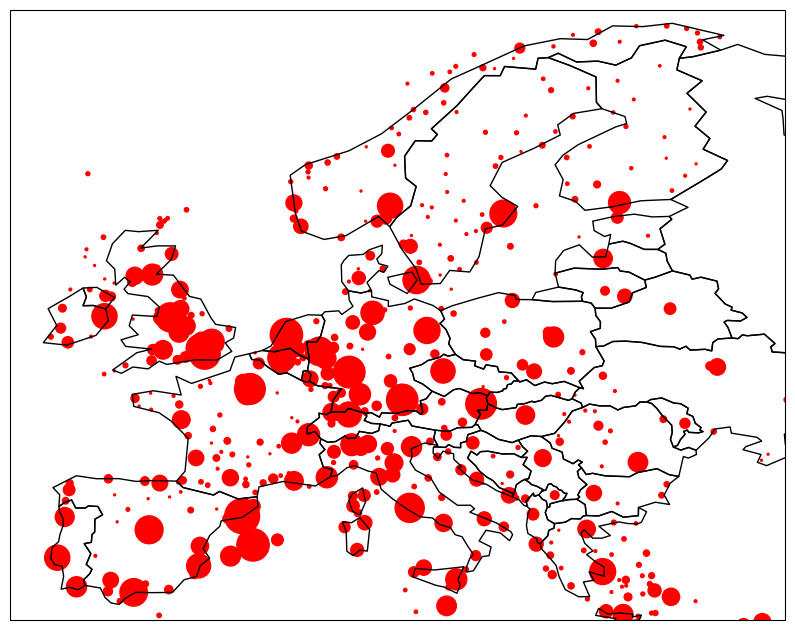

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world.continent == 'Europe']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-12, 35, 35, 72], crs=ccrs.PlateCarree())
ax.add_geometries(europe.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none')
ax.scatter(lons, lats, s=sizes, color='red', transform=ccrs.PlateCarree())
plt.show()

In [ ]:
g.degree(1382)